##To predict the closing stock price of TATA MOTORS.

###Import the libraries

In [ ]:
#import the libraries
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd 'drive/My Drive/Stock'

/content/drive/My Drive/Stock


In [ ]:
df = pd.read_csv('NSE-TATAMOTORS.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,169.00,171.95,168.50,171.15,170.95,17650435.0,30087.78
1,2019-01-03,169.00,170.15,165.10,165.70,166.05,9321842.0,15642.68
2,2019-01-02,170.60,171.75,168.00,168.40,168.55,13410104.0,22776.69
3,2019-01-01,173.50,174.20,171.30,174.00,173.45,6715543.0,11598.67
4,2018-12-31,172.45,173.90,171.75,173.05,172.70,8511388.0,14707.36
...,...,...,...,...,...,...,...,...
3729,2004-01-01,453.25,457.90,451.50,454.00,454.45,2077604.0,9457.51
3730,2003-12-31,446.00,459.30,443.55,452.10,452.05,4311596.0,19551.42
3731,2003-12-30,450.00,451.90,430.10,444.85,442.40,2683293.0,11894.85
3732,2003-12-29,441.00,449.70,441.00,448.40,447.80,2125952.0,9497.72


In [ ]:
df.shape

(3734, 8)

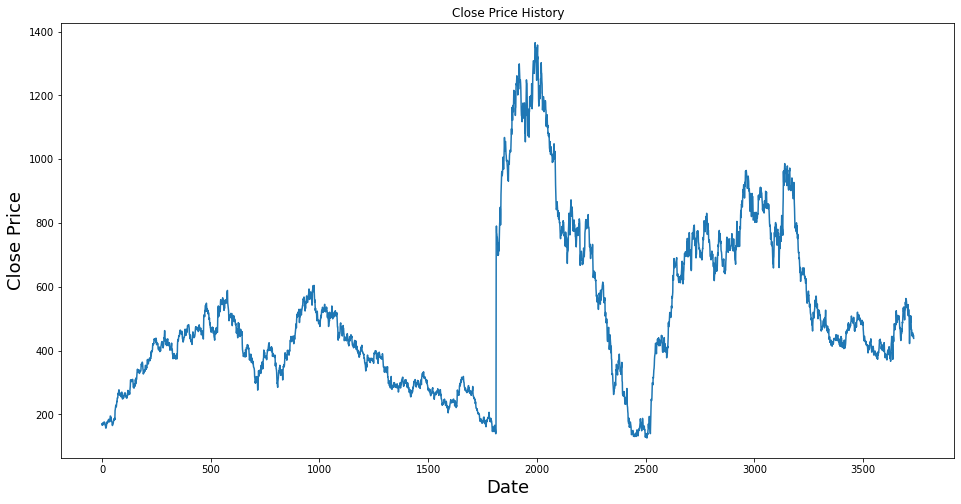

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()


In [ ]:
data = df.filter(['Close'])

dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len 

2988

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03611929],
       [0.03216433],
       [0.03418217],
       ...,
       [0.25521611],
       [0.25957464],
       [0.252149  ]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


if i<= 60:
  print(x_train)
  print(y_train)
  print()

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(2928, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2928/2928 [==============================] - 64s 22ms/step - loss: 0.0016


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 2928
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

19.567432205159285

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


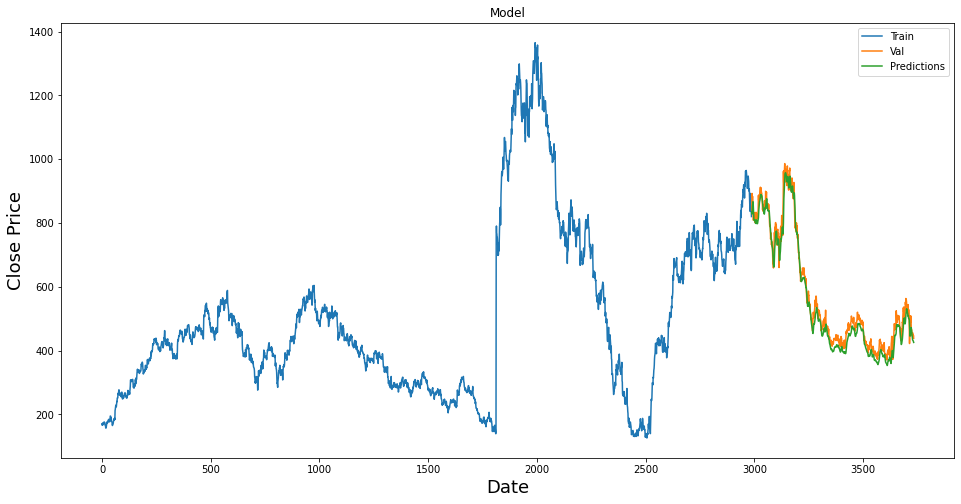

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'upper right')
plt.show()

In [ ]:
valid

,Close,Predictions
2988,839.45,832.824463
2989,866.80,827.885986
2990,892.70,832.703491
2991,881.45,845.898804
2992,883.00,855.783569
...,...,...
3729,454.45,432.405823
3730,452.05,431.561188
3731,442.40,430.591248
3732,447.80,427.624329
